In [1]:
import doodler_forall as dd
import numpy as np
import utils as u
from pathlib import Path
from datetime import datetime

import matplotlib.pyplot as plt

In [2]:
_doodle_image_types = dd._doodle_image_types_

In [3]:
dataset_name = u.create_dataset(dataset_size=750, image_size=20, image_types=_doodle_image_types[:5], proportions=(500/75, 100/75, 100 - 600/75))

In [4]:
training_set, testing_set, val_set = u.load_dataset(dataset_name)

In [5]:
def verify_distribution_in_dataset(dataset_name):
    training_set, testing_set, val_set = u.load_dataset(dataset_name)
    _, _, labels_train = training_set
    _, _, labels_test = testing_set
    _, _, labels_val = val_set

    plt.hist(labels_train, bins=20)
    plt.show()

    plt.hist(labels_test, bins=20)
    plt.show()

    plt.hist(labels_val, bins=20)
    plt.show()

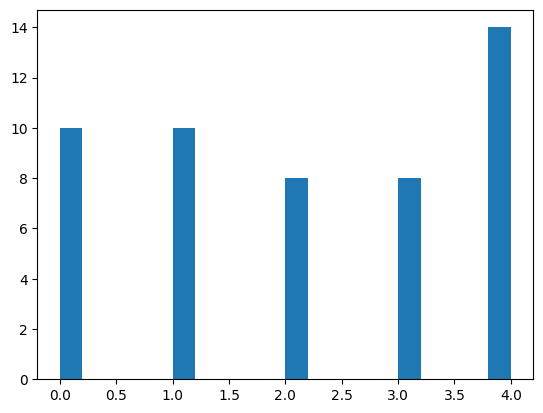

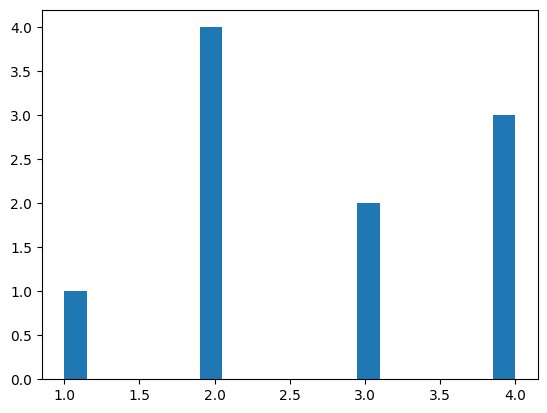

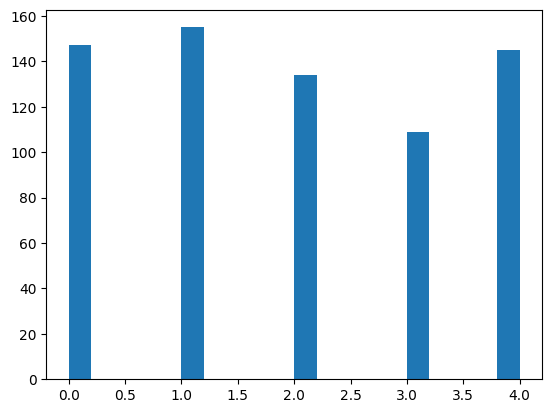

In [6]:
verify_distribution_in_dataset(dataset_name)

In [7]:
type(val_set[2])

numpy.ndarray

In [8]:
labels = np.concatenate((training_set[2], testing_set[2], val_set[2]))

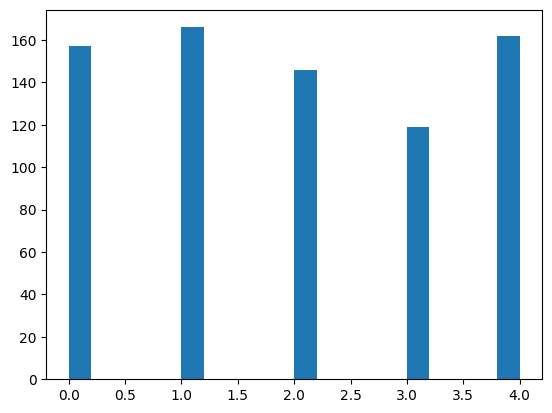

In [9]:
plt.hist(labels, bins=20)
plt.show()